# Polynomial linear regression

## Importing libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading data

In [12]:
dataset = pd.read_csv("Position_Salaries.csv")

In [13]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [14]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [17]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
linear_reg_2 = LinearRegression()
linear_reg_2.fit(X_poly,y)

LinearRegression()

## Visualising the Linear Regression results

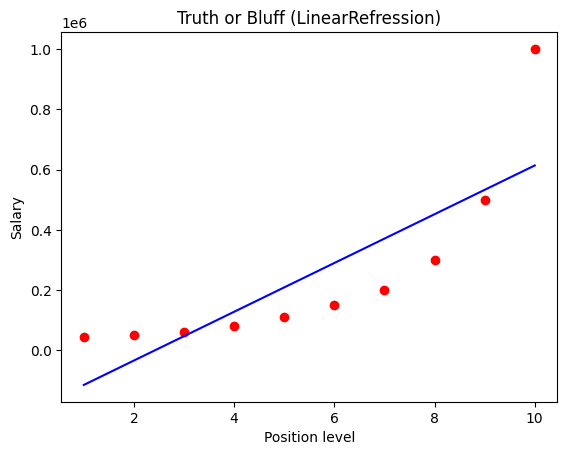

In [23]:
plt.scatter(X, y, color='red')
plt.plot(X, linear_reg.predict(X), color='blue')
plt.title("Truth or Bluff (LinearRefression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results

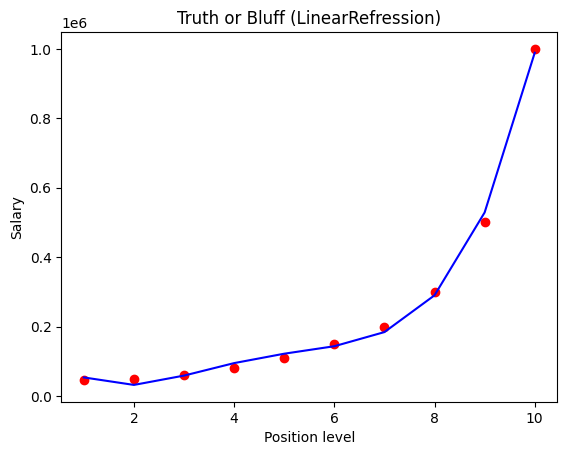

In [24]:
plt.scatter(X, y, color='red')
plt.plot(X, linear_reg_2.predict(poly_reg.fit_transform(X)), color='blue')
plt.title("Truth or Bluff (LinearRegression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)


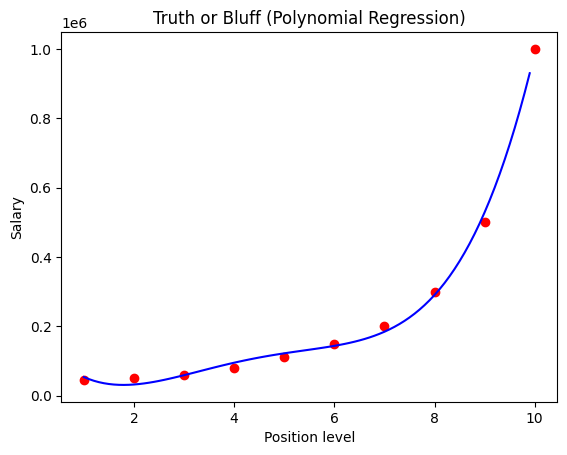

In [25]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [26]:
print(linear_reg.predict([[6.5]]))

[330378.78787879]


## Predicting a new result with Polynomial Regression


In [32]:
print(linear_reg_2.predict(poly_reg.fit_transform([[6.5]])))

[158862.45265155]


# PyTorch

Epoch [100/100], Loss: 7358323712.0000
Test Set Mean Squared Error: 6553152512.0000


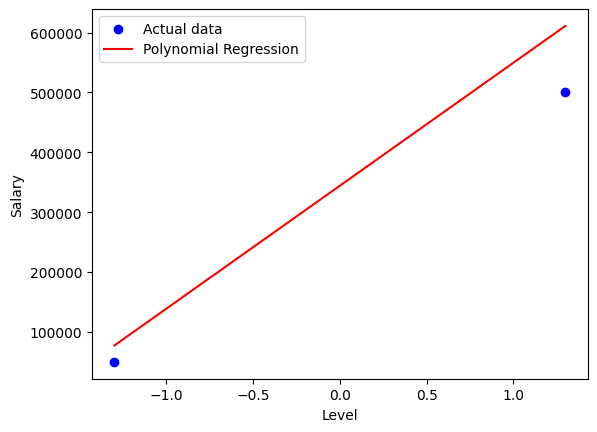

In [114]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Position_Salaries.csv')

# Separate features and target variable
X = df[['Level']]
y = df['Salary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Polynomial regression degree
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_tensor.numpy())
X_test_poly = poly.transform(X_test_tensor.numpy())

# Convert back to PyTorch tensors
X_train_poly_tensor = torch.tensor(X_train_poly, dtype=torch.float32)
X_test_poly_tensor = torch.tensor(X_test_poly, dtype=torch.float32)

# Define the polynomial regression model
class PolynomialRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(PolynomialRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_size = X_train_poly_tensor.shape[1]
model = PolynomialRegressionModel(input_size)

# Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_poly_tensor)
    loss = loss_fn(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Make predictions on the test set
with torch.no_grad():
    predictions = model(X_test_poly_tensor)

# Calculate the test set mean squared error
mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
print(f'Test Set Mean Squared Error: {mse:.4f}')

# Visualize the results (for 1D input features)
#if input_size == 1:
plt.scatter(X_test_tensor.numpy(), y_test_tensor.numpy(), color='blue', label='Actual data')
plt.plot(X_test_tensor.numpy(), predictions.numpy(), color='red', label='Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()
